# Creating Geospatial Heatmaps with Folium and Plotly Express

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('xeek_force_2020_dtc_mapping.csv').drop(['Unnamed: 0'],axis=1)
df

,WELL,DTC,Temperature,Water Depth,Completion Year,Latitude,Longitude
0,15/9-13,66.274376,91.0,81.0,1982,58.373878,1.934128
1,15/9-15,67.878158,116.0,83.0,1982,58.302069,1.922131
2,15/9-17,75.505541,108.0,85.0,1983,58.445608,1.948217
3,16/10-1,71.281390,123.0,84.0,1986,58.056578,2.053903
4,16/10-2,68.900562,117.0,79.0,1991,58.140717,2.037475
...,...,...,...,...,...,...,...
71,35/9-10 S,87.248085,0.0,365.0,2013,61.251972,3.684417
72,35/9-2,88.222545,100.0,367.0,1991,61.335728,3.937983
73,35/9-6 S,100.077913,125.0,369.0,2010,61.371192,3.692650
74,36/7-3,79.360738,0.0,349.0,2002,61.425867,4.049892


## Plotly Express

In [5]:
import plotly_express as px

In [18]:
fig = px.density_mapbox(df,
                        lat='Latitude', lon='Longitude',
                        z='DTC', radius=70,
                        center=dict(lat=df.Latitude.mean(), 
                                    lon=df.Longitude.mean()), 
                        zoom=4,
                        mapbox_style="open-street-map", 
                        height=900)


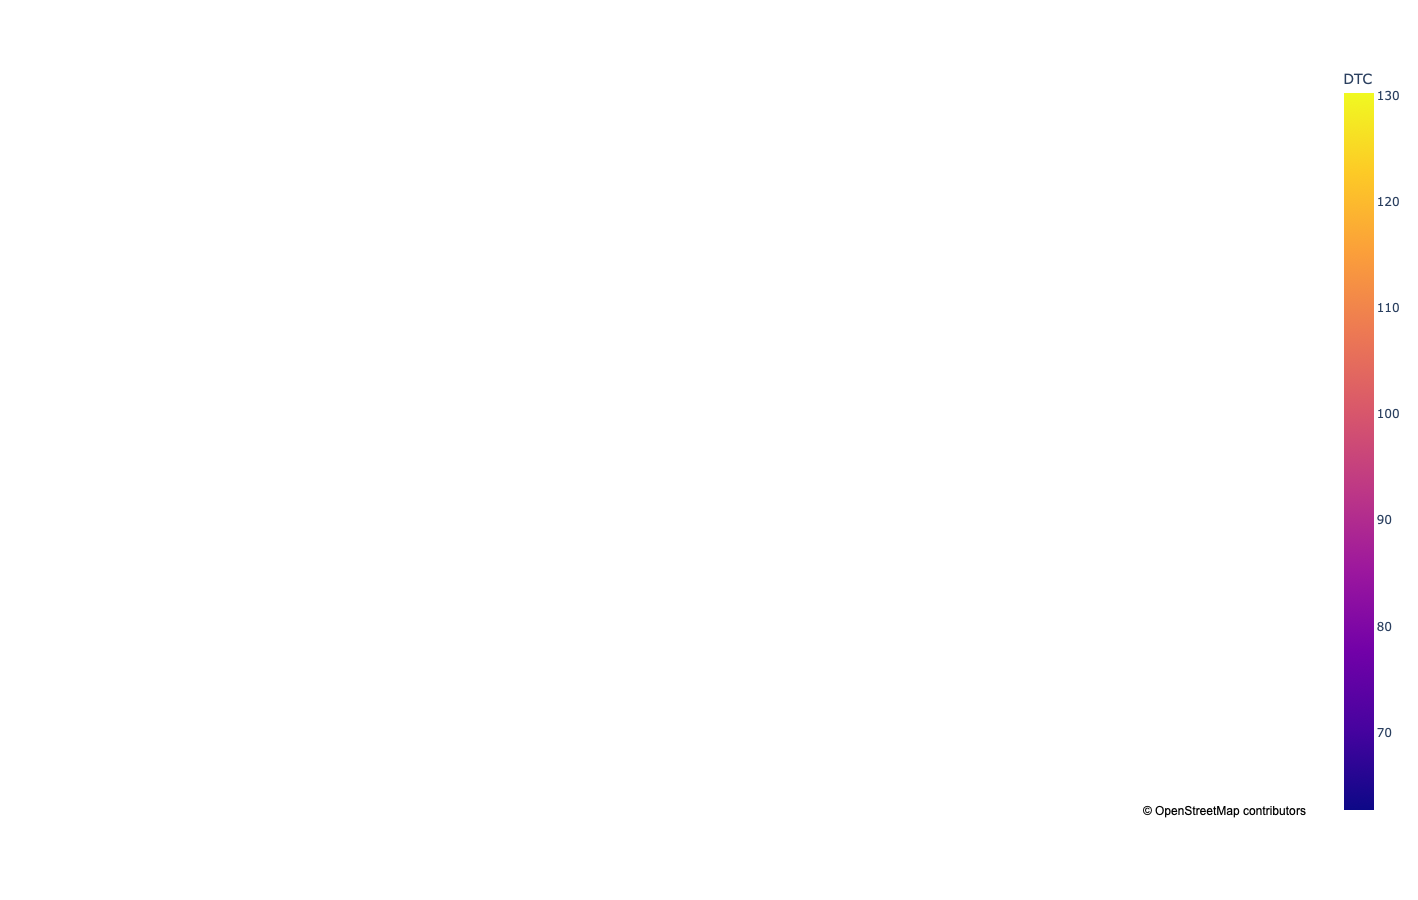

In [19]:
fig.show()

## Folium

In [20]:
import folium
from folium.plugins import HeatMap

In [21]:
m = folium.Map(location=[df.Latitude.mean(), 
                         df.Longitude.mean()], 
               zoom_start=6, control_scale=True)

In [22]:
m

In [23]:
map_values1 = df[['Latitude','Longitude','DTC']]

data = map_values1.values.tolist()

hm = HeatMap(data, 
                min_opacity=0.05, 
                max_opacity=0.9, 
                radius=25).add_to(m)

In [25]:
m